# Decision Tree
- Pick a classification dataset from the LIBSVM repository:
- Partition the dataset into a training set and a validation set. 
- Run a decision tree algorithm on the training set to generate a decision tree.
- Validate the decision tree on the validation dataset and report the total classification error (i.e. 0/1 error). 
- Repeat the experiment with a different partition of training set/validation set. 
- Plot the resulting tree. 
- Are the resulting decision trees very different? Explain why.
* Advice: it can be convenient to set a maximum depth for the tree.

In [198]:
import numpy as np
import pandas as pd
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_svmlight_file
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [199]:
#load the file directly from URL - have to finish this!
#with urllib.request.urlopen('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes') as response:
#   text = response.read()
#print(text)

In [200]:
#load the file and read the labels in Y and data in X
# X, Y = load_svmlight_file('/Users/aideenf/Desktop/Datasets/diabetes_scale.svm')
X, Y = load_svmlight_file('diabetes_scale.svm')
#X, Y = load_svmlight_file('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes')

In [201]:
#Split the data twice so we can run two tests, each on different data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X, Y, test_size = 0.2)

In [202]:
# Use a decision tree with gini on the two different training data sets
# first here with X_Train and Y_train so data is divided 80% for training and 20% for testing
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5)
clf_gini.fit(X_train, Y_train)
Y_pred_gini_train = clf_gini.predict(X_train)

Y_pred_gini = clf_gini.predict(X_test)

accuracy_gini_train = accuracy_score(Y_train,Y_pred_gini_train)*100
print(accuracy_gini_train)
accuracy_gini = accuracy_score(Y_test,Y_pred_gini)*100
print(accuracy_gini)
# Print Accuracy with gini train and validate with data divided 80% for training and 20% for testing

85.50488599348535
72.72727272727273


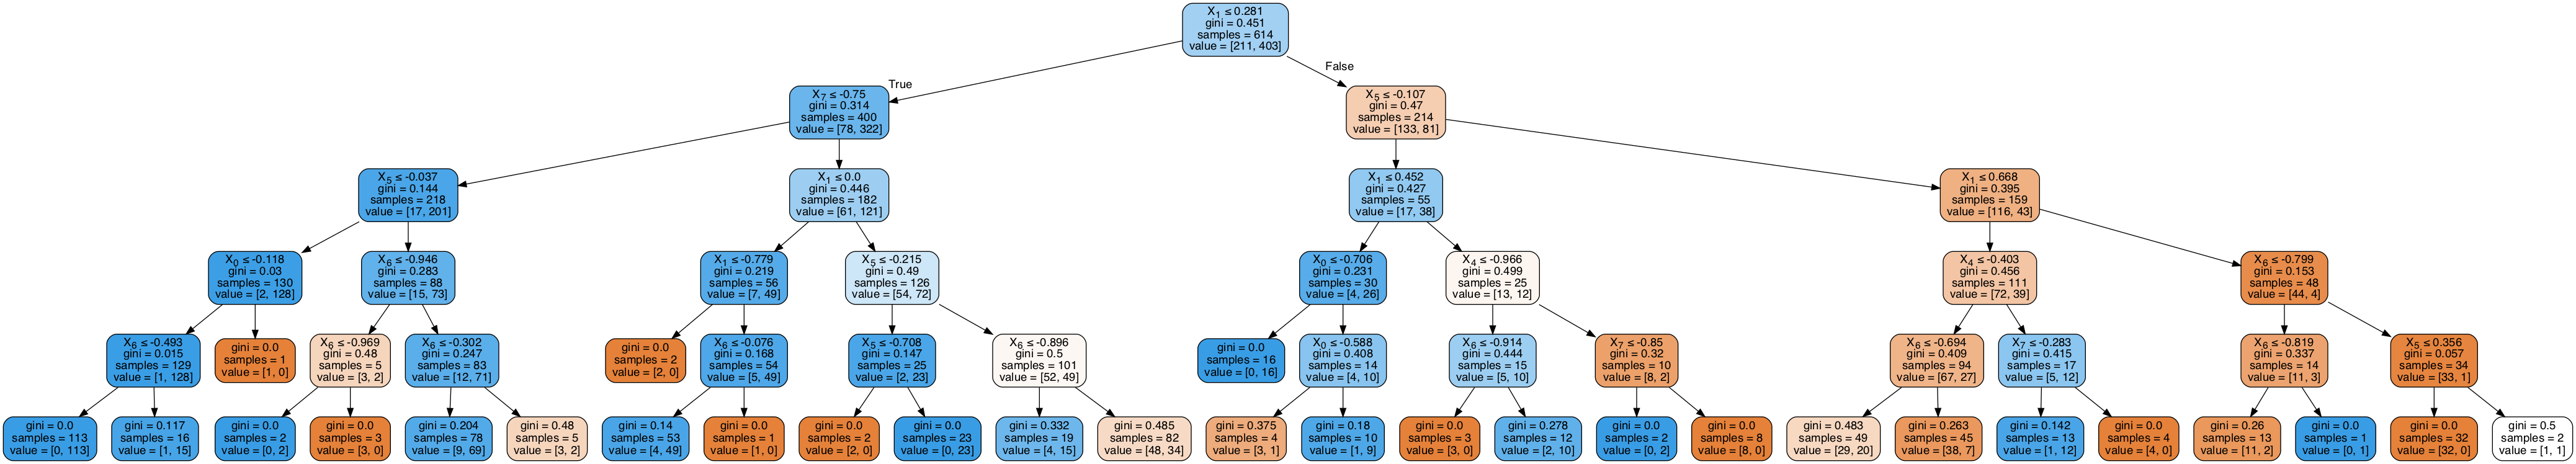

In [203]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=1000, height=800)
# Plot the deciusion tree here with gini and data divided 80% for training and 20% for testing


In [204]:
#Now run on the second train/test split data is divided 20% for training and 80% for testing
clf_gini.fit(X_trainB, Y_trainB)
Y_pred_giniB_train = clf_gini.predict(X_trainB)
Y_pred_giniB = clf_gini.predict(X_testB)

accuracy_giniB_train = accuracy_score(Y_trainB,Y_pred_giniB_train)*100
print(accuracy_giniB_train)
accuracy_giniB = accuracy_score(Y_testB,Y_pred_giniB)*100
print(accuracy_giniB)
#Print Accuracy with gini and data divided 20% for training and 80% for testing

83.22475570032573
80.51948051948052


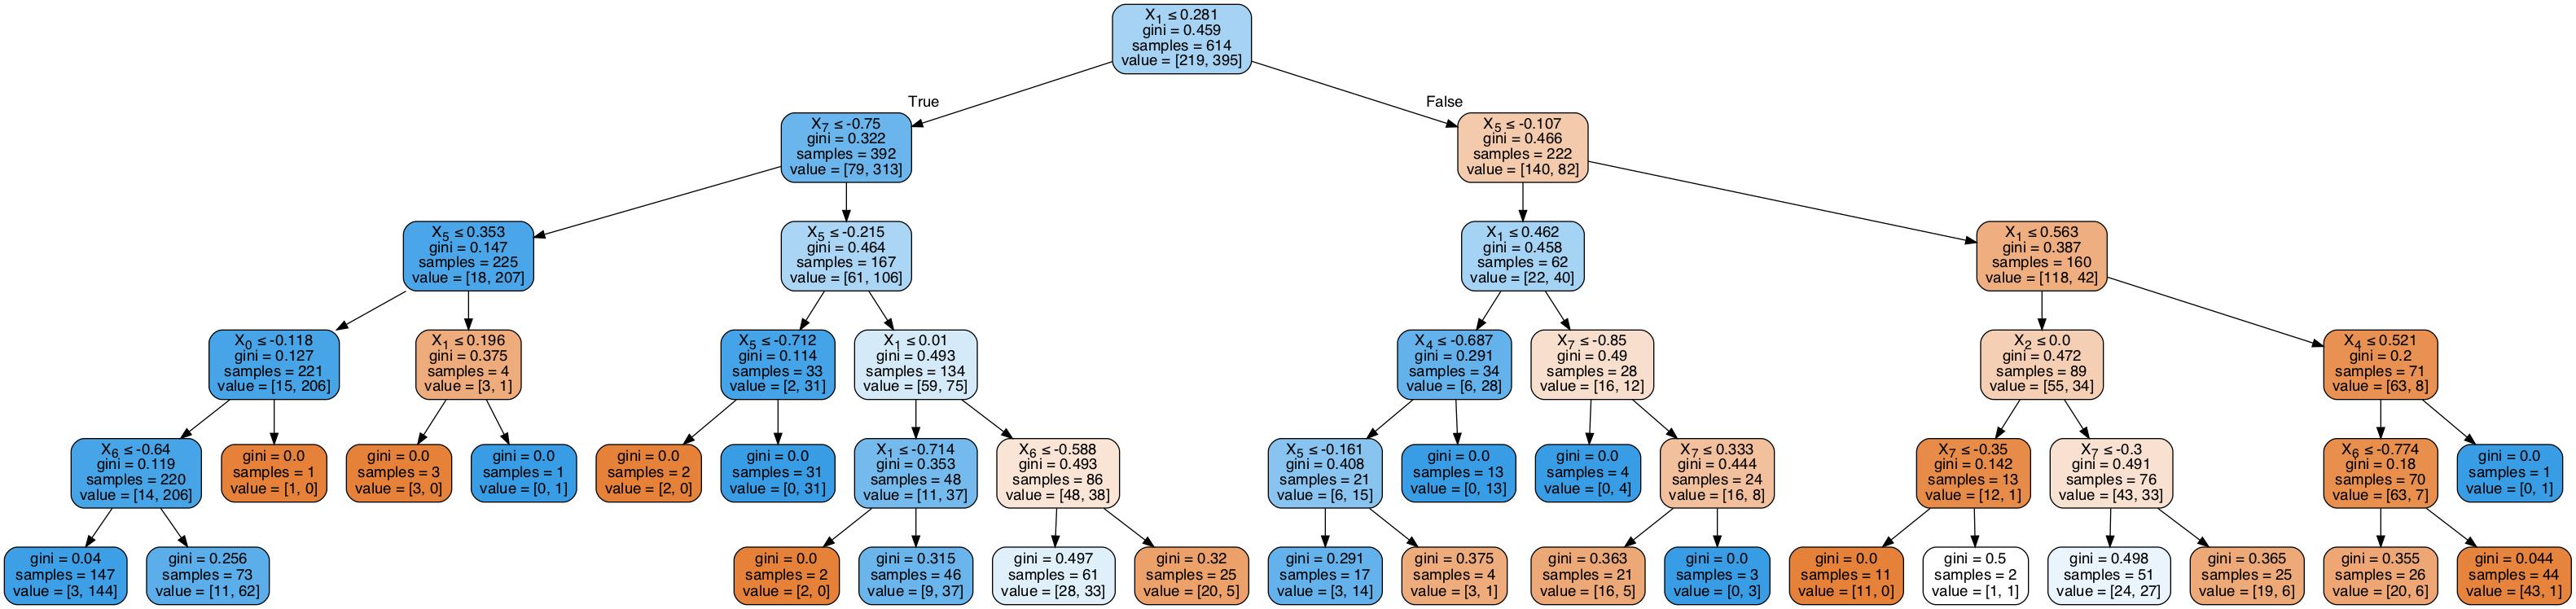

In [205]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=1000, height=800)
# Plot here with gini and data  divided 20% for training and 80% for testing

# Are the resulting decision trees very different? Explain why.

The resulting trees are different: 
Even though the Training/validation split is the same in both cases, the second tree has a much better out of sample accuracy of 80.5% v's the first tree which has an out of sample accuracy of 72%.
we can also see that the decision tree is physically different, the values of the various decision paramaters are different which can result in a different physical tree. 

Why: 
Decision Trees can be extremely sensitive to small changes in the data so that a slight change in the training data can result in a drastically different tree. Examining the two trees we can see that the decision values on the various decision nodes are indeed different. 

The decision tree can also easily overfit or have problems out-of-sample prediction. This could potentially be negated by validation methods and pruning but this has not been covered in the exercise. The first tree in this particular report may have overfitted as the in sample accuracy is significantly higher than the out of sample accuracy.

The Gini algorithm we have used to construct the tree works from top-down, by choosing a variable at each step that best splits the Items. Different algorithms use different metrics for measuring "best". This metric is applied to each candidate subset and the resulting values are combined (for example averaged) to provide a measure of the quality of the split. The Gini value is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability P(i) of an item with label i being chosen times the probability 1-p(i) of a mistake in categorising the item. It reaches its minimum (zero) when all cases in the node fall into a single target category.


In [ ]:
# Note:  
# The final result is a tree with decision nodes and leaf nodes. 
# A decision node has two or more branches. 
# A Leaf node represents a classification or decision. 
# The top-most decision node in a tree which corresponds to the best predictor is called root node.
# https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134


# The objectibe of the decision tree is t Information gain (IG) measures how much “information” a feature 
# gives us about the class.
# https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01
# https://github.com/Jam3/math-as-code

In [ ]:
# 